# Коэффициент корреляции Пирсона 

### Коэффициент корреляции r-Пирсона является мерой прямолинейной связи между переменными: его значения достигают максимума, когда точки на графике двумерного рассеяния лежат на одной прямой линии. Коэффициент корреляции r - Пирсона оценивает только линейную связь переменных.

$r_{xy}=\frac{\Sigma(x_i-\bar{x})\times(y_i-\bar{y})}{\sqrt{\Sigma(x_i-\bar{x})^2\times\Sigma(y_i-\bar{y})^2}}$

где $x_i$ — значения переменной X; $y_i$ — значения переменной Y;  $\bar x$ — среднее арифметическое для переменной X; $\bar y$ -среднее арифметическое для переменной Y.

# Подключение библиотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from copy import deepcopy
from scipy import stats

# Добыча данных

In [9]:
dataset = pd.read_csv('titanic.csv')
dataset = dataset.rename(
    columns={
        'PassengerId': 'Пассажиры',
        'Survived': 'Выжившие',
        'Pclass': 'Класс',
        'Name': 'Имя',
        'Sex': 'Пол',
        'Age': 'Возраст',
        'SibSp': 'Кол-во братьев, сестер и т.д.',
        'Parch': 'Кол-во родителей, детей',
        'Ticket': 'Номер билета',
        'Fare': 'Плата',
        'Cabin': 'Каюта',
        'Embarked': 'Порт посадки'
    }
)
dataset

,Пассажиры,Выжившие,Класс,Имя,Пол,Возраст,"Кол-во братьев, сестер и т.д.","Кол-во родителей, детей",Номер билета,Плата,Каюта,Порт посадки
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Корреляция


## Общая тепловая карта

<AxesSubplot:>

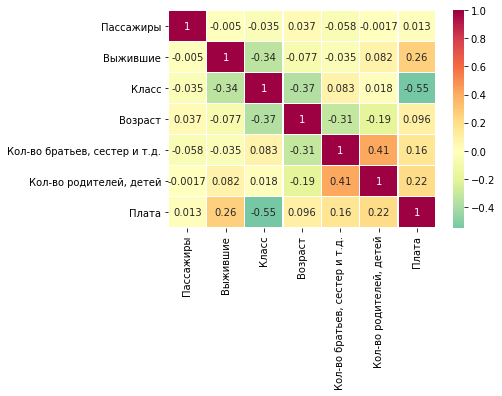

In [3]:
sns.heatmap(dataset.corr(), annot=True, cmap="Spectral_r", linewidths=.5, center = 0)

## Парный график
### График пар — это матрица диаграмм рассеяния , которая позволяет понять попарные отношения между различными переменными в наборе данных.

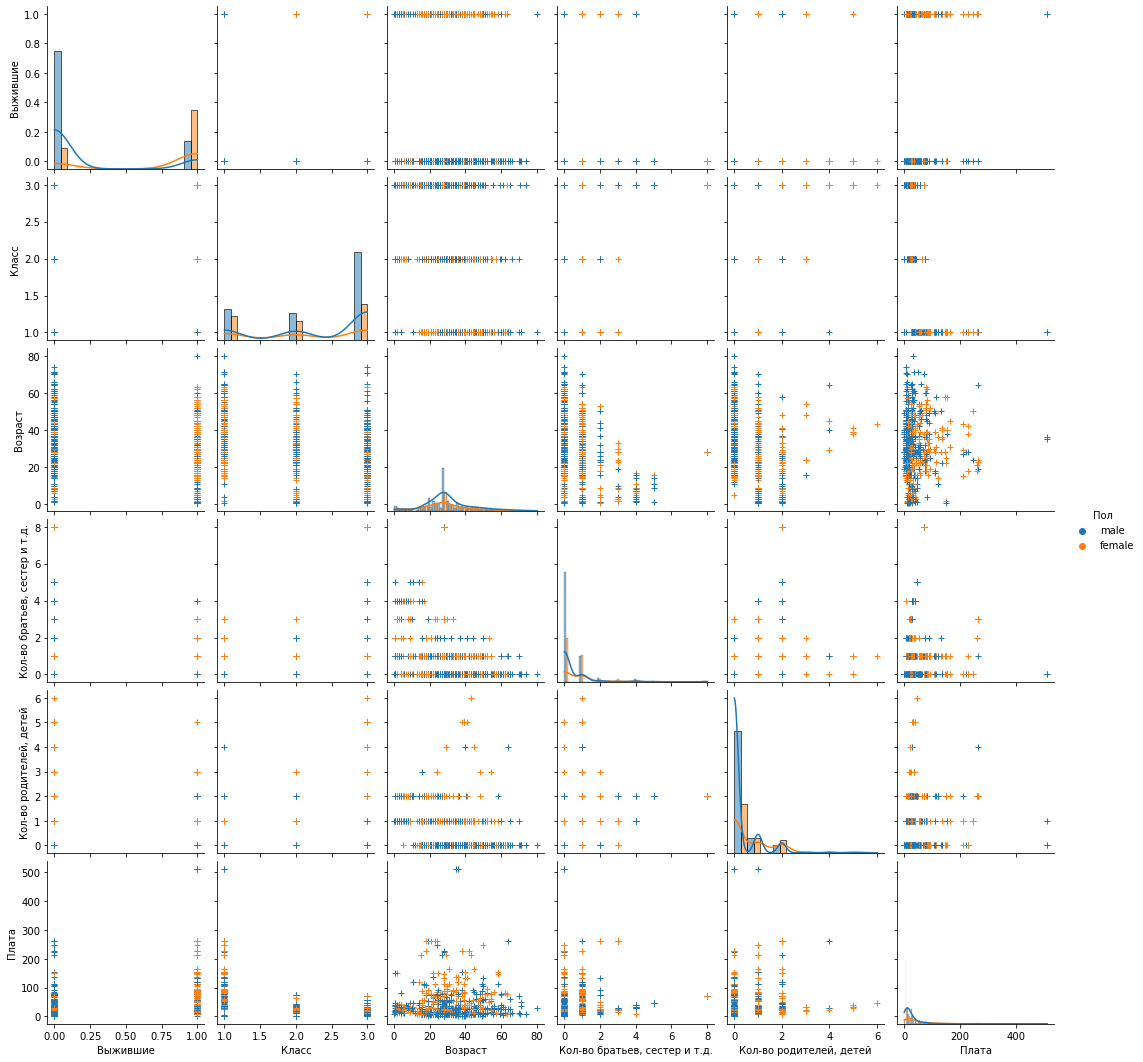

In [13]:
sns.pairplot(data=dataset, vars=dataset.columns[[1,2,5,6,7,9]], hue="Пол",plot_kws=dict(marker="+", linewidth=1), diag_kind="hist", diag_kws=dict(multiple="dodge", kde=True))

## Диаграмма и тепловой карты «Плата» и «Возраст»

<AxesSubplot:xlabel='Плата', ylabel='Возраст'>

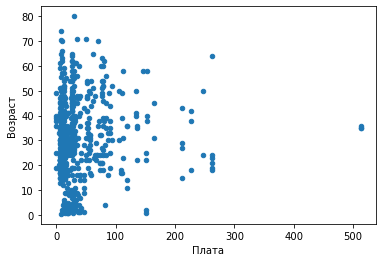

In [5]:
dataset.plot.scatter(x = "Плата", y = "Возраст")

<AxesSubplot:>

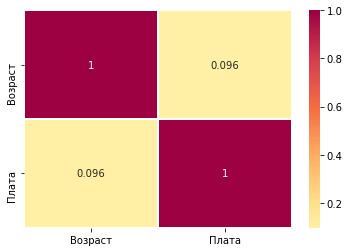

In [7]:
sns.heatmap(dataset[["Возраст", "Плата"]].corr(), annot=True, cmap="Spectral_r", linewidths=.5, center = 0)

### заполнение пропущенных данных средними значениями

In [10]:
dataset.loc[dataset["Возраст"].isna(), "Возраст"] = dataset["Возраст"].median()

# Тест Шапиро-Вилка


In [11]:
from scipy.stats import shapiro
w, p = shapiro(dataset["Возраст"])
print("w = ", w)
print("p = ", p)

w =  0.9541045427322388
p =  4.650938269969563e-16


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

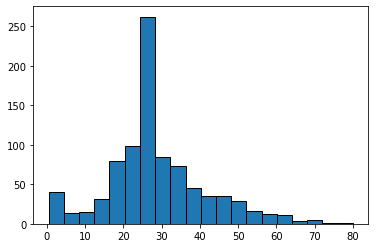

In [12]:
import matplotlib.pyplot as plt
plt.hist (dataset["Возраст"], edgecolor='black', bins=20 )

# Алгоритм К-средних

In [20]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.cluster import KMeans

In [21]:
X = np.array([[5,3], [10,15], [15,12], [24,10], [30,45], [85,70], [71,80], [60,78], [55,52], [80,91],])

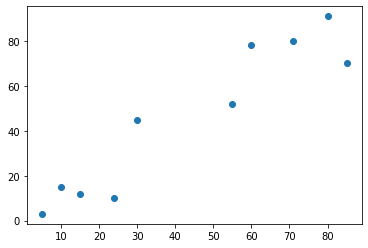

In [22]:
plt.scatter(X[:,0],X[:,1], label='True Position')

In [23]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [24]:
print(kmeans.cluster_centers_) #Здесь первая строка содержит значения для координат первого центроида, т.е. (16.8, 17), а вторая строка содержит значения для координат другого центроида

[[16.8 17. ]
 [70.2 74.2]]


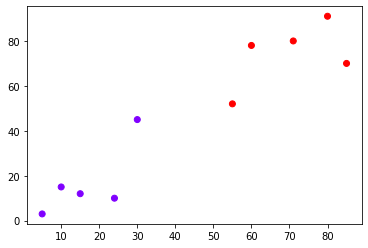

In [25]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')